# W9- Product Recommendation.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

%config InlineBackend.figure_format='retina'

C:\Users\Khanistha\.conda\envs\DADS\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Khanistha\.conda\envs\DADS\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Khanistha\.conda\envs\DADS\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
print(f'pandas    version: {pd.__version__}')
print(f'mlxtend   version: {mlxtend.__version__}')

pandas    version: 1.5.2
mlxtend   version: 0.22.0


In [3]:
pd.Timestamp.now()

Timestamp('2023-07-15 22:26:34.771683')

In [4]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

## read data

In [5]:
df = pd.read_csv('data_getnew2023.csv')

print(df.shape)
df.head(10)

(362109, 244)


,ent,0C1CC1,0C1CCE,0C4C4Z,0C4CCJ,0C4CCZ,0C4CE1,0C4CE4,0C4CEC,0C4CEE,...,XC4CC4,XC4CCE,XC4CCZ,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,YC1CC4
0,TCC4QCZJZQI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCC4QCE34Z7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TCC44Q3JQQ2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCC41JJZCRF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TCC4JZCJ1JK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,TCC4WQRQZ40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TCC4Q4JJ3Q0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,TCCEJ3444WF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,TCCE4ERZR40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,TCCEJ34JWC5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.replace({0: False, 1: True})
df[:5]

,ent,0C1CC1,0C1CCE,0C4C4Z,0C4CCJ,0C4CCZ,0C4CE1,0C4CE4,0C4CEC,0C4CEE,...,XC4CC4,XC4CCE,XC4CCZ,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,YC1CC4
0,TCC4QCZJZQI,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,TCC4QCE34Z7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,TCC44Q3JQQ2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,TCC41JJZCRF,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,TCC4JZCJ1JK,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
#data=pd.read_csv(url)
#data[:5]

In [8]:
#df=data['items'].str.get_dummies('|').astype(pd.SparseDtype("bool"))
#df[:5]

In [9]:
# drop columns > MONTH_ID ที่ไม่ต้องการออกไป
df.drop(['ent'], axis=1, inplace=True)
df

,0C1CC1,0C1CCE,0C4C4Z,0C4CCJ,0C4CCZ,0C4CE1,0C4CE4,0C4CEC,0C4CEE,0C4CER,...,XC4CC4,XC4CCE,XC4CCZ,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,YC1CC4
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## find frequent item sets

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

# calculate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets.head()

(50, 2)


,support,itemsets
0,0.014037,(0C1CC1)
1,0.020555,(0C1CCE)
2,0.040974,(0C4CCZ)
3,0.010740,(0CECCR)
4,0.019096,(2C1CCQ)


In [11]:
# generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(15)

(22, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(EQE1),(KCJCEZ),0.013626,0.016909,0.010279,0.754358,44.612061,0.010048,4.002120,0.991089
21,(KCJCEZ),(EQE1),0.016909,0.013626,0.010279,0.607872,44.612061,0.010048,2.515439,0.994399
19,(KC4CC4),(8C4CC4),0.047033,0.066916,0.010770,0.228994,3.422098,0.007623,1.210216,0.742713
18,(8C4CC4),(KC4CC4),0.066916,0.047033,0.010770,0.160951,3.422098,0.007623,1.135770,0.758540
17,(BC4CC4),(7C4CC4),0.102127,0.081821,0.014725,0.144182,1.762173,0.006369,1.072868,0.481715
16,(7C4CC4),(BC4CC4),0.081821,0.102127,0.014725,0.179965,1.762173,0.006369,1.094921,0.471061
10,(6CQC41),(8C4CCR),0.212091,0.049529,0.017285,0.081497,1.645439,0.006780,1.034805,0.497848
11,(8C4CCR),(6CQC41),0.049529,0.212091,0.017285,0.348982,1.645439,0.006780,1.210273,0.412700
12,(BC4C41),(6CQC41),0.072014,0.212091,0.023670,0.328680,1.549715,0.008396,1.173672,0.382248
13,(6CQC41),(BC4C41),0.212091,0.072014,0.023670,0.111602,1.549715,0.008396,1.044560,0.450205


C:\Users\Khanistha\.conda\envs\DADS\lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


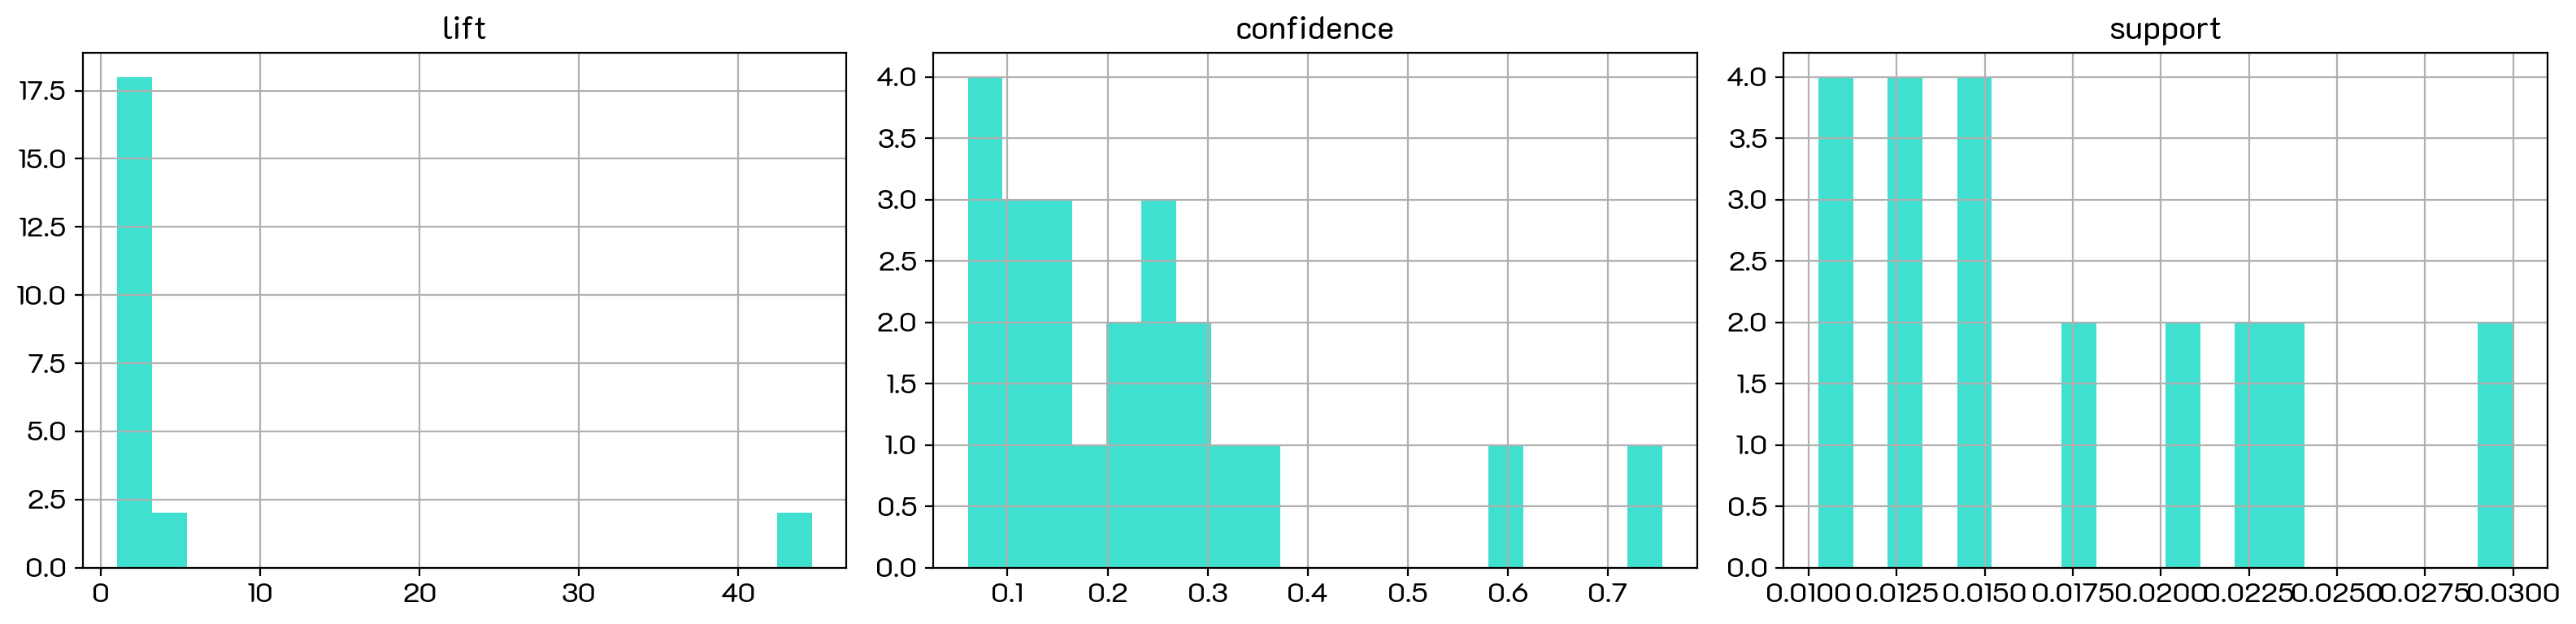

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='turquoise')
    ax.set_title(var)
plt.show()

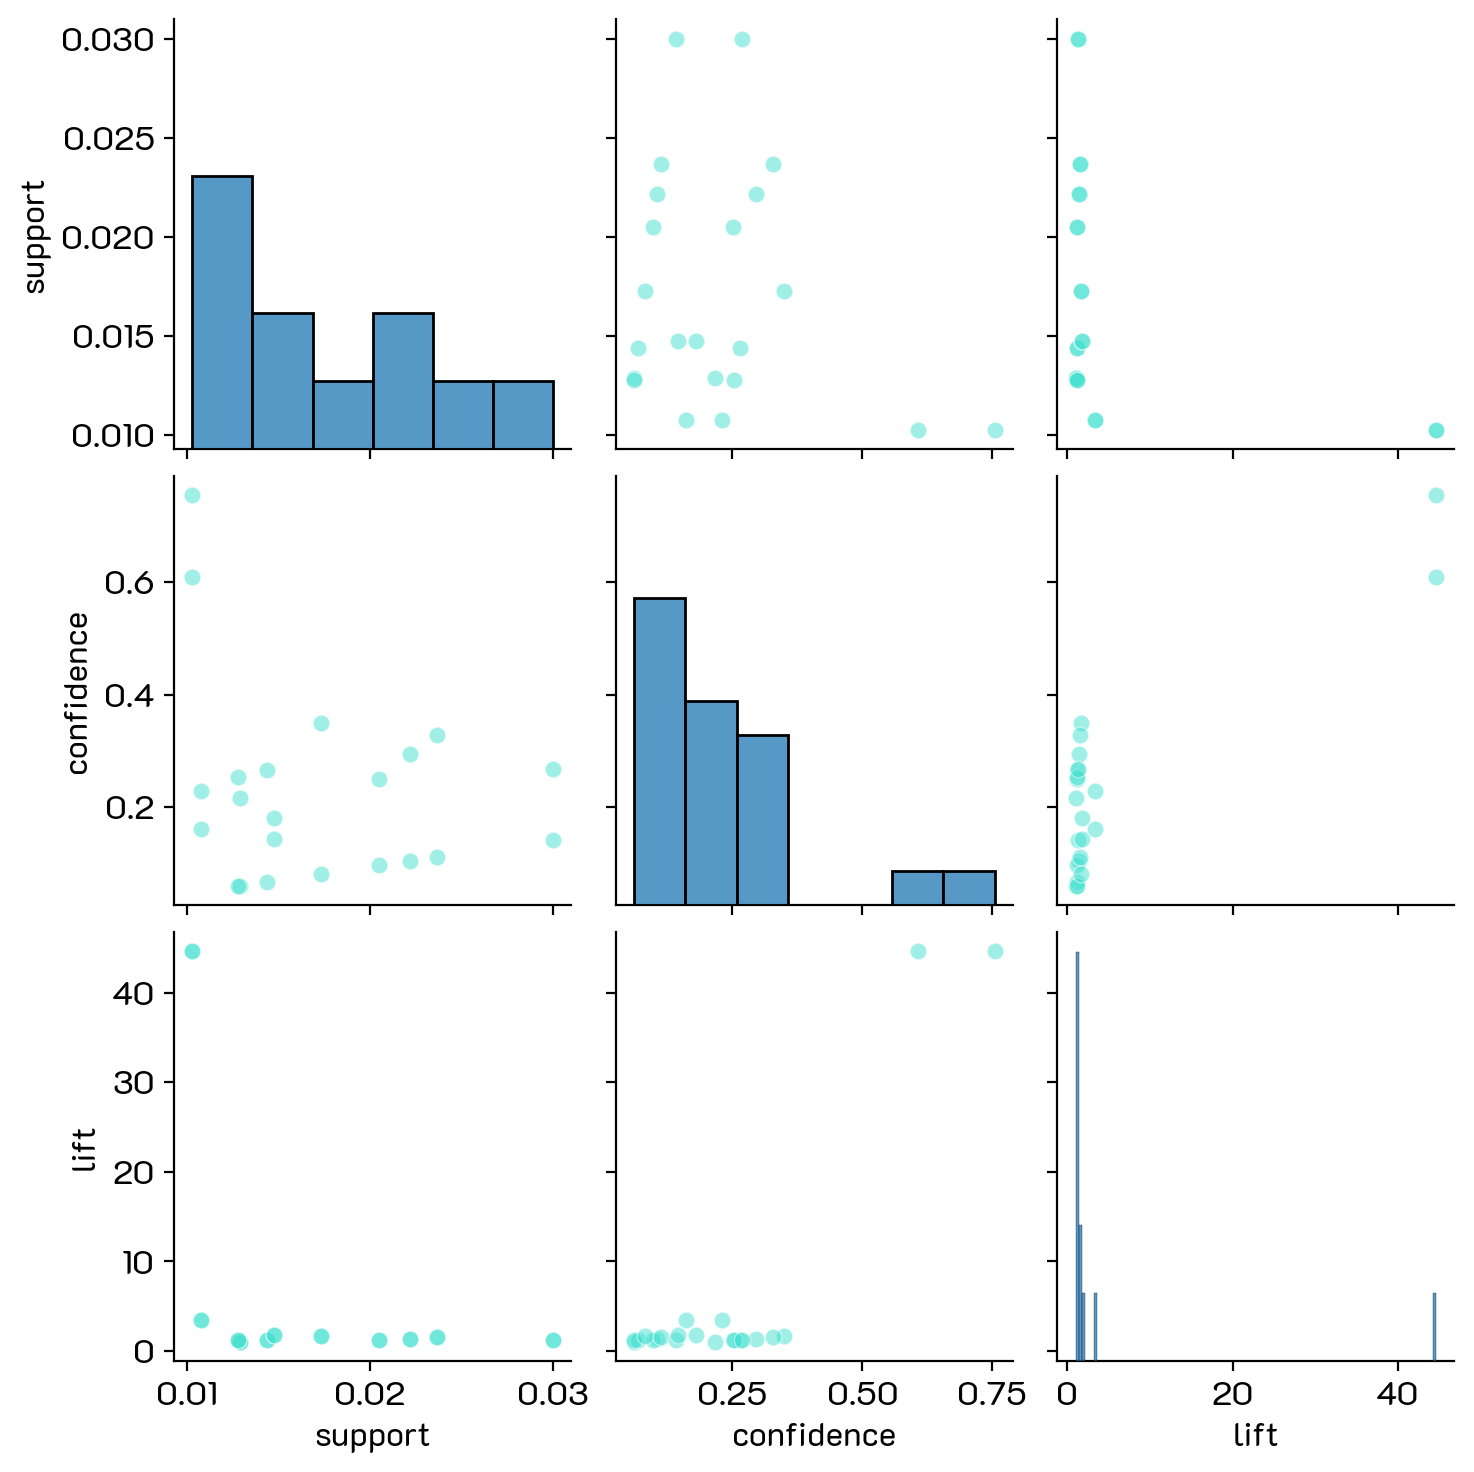

In [13]:
sns.pairplot(rules, vars=['support','confidence','lift'], plot_kws = {'color':'turquoise', 'alpha':.5});

## rules and metrices

In [14]:
import pandas as pd

# นำเข้าข้อมูลที่ต้องการใช้งาน
# rules = pd.read_csv('path/to/rules.csv')

simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)


(2, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(EQE1),(KCJCEZ),0.013626,0.016909,0.010279,0.754358,44.612061,0.010048,4.002120,0.991089
21,(KCJCEZ),(EQE1),0.016909,0.013626,0.010279,0.607872,44.612061,0.010048,2.515439,0.994399


In [15]:
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

C:\Users\Khanistha\AppData\Local\Temp\ipykernel_12104\3601118159.py:5: RuntimeWarning: invalid value encountered in divide
  width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8


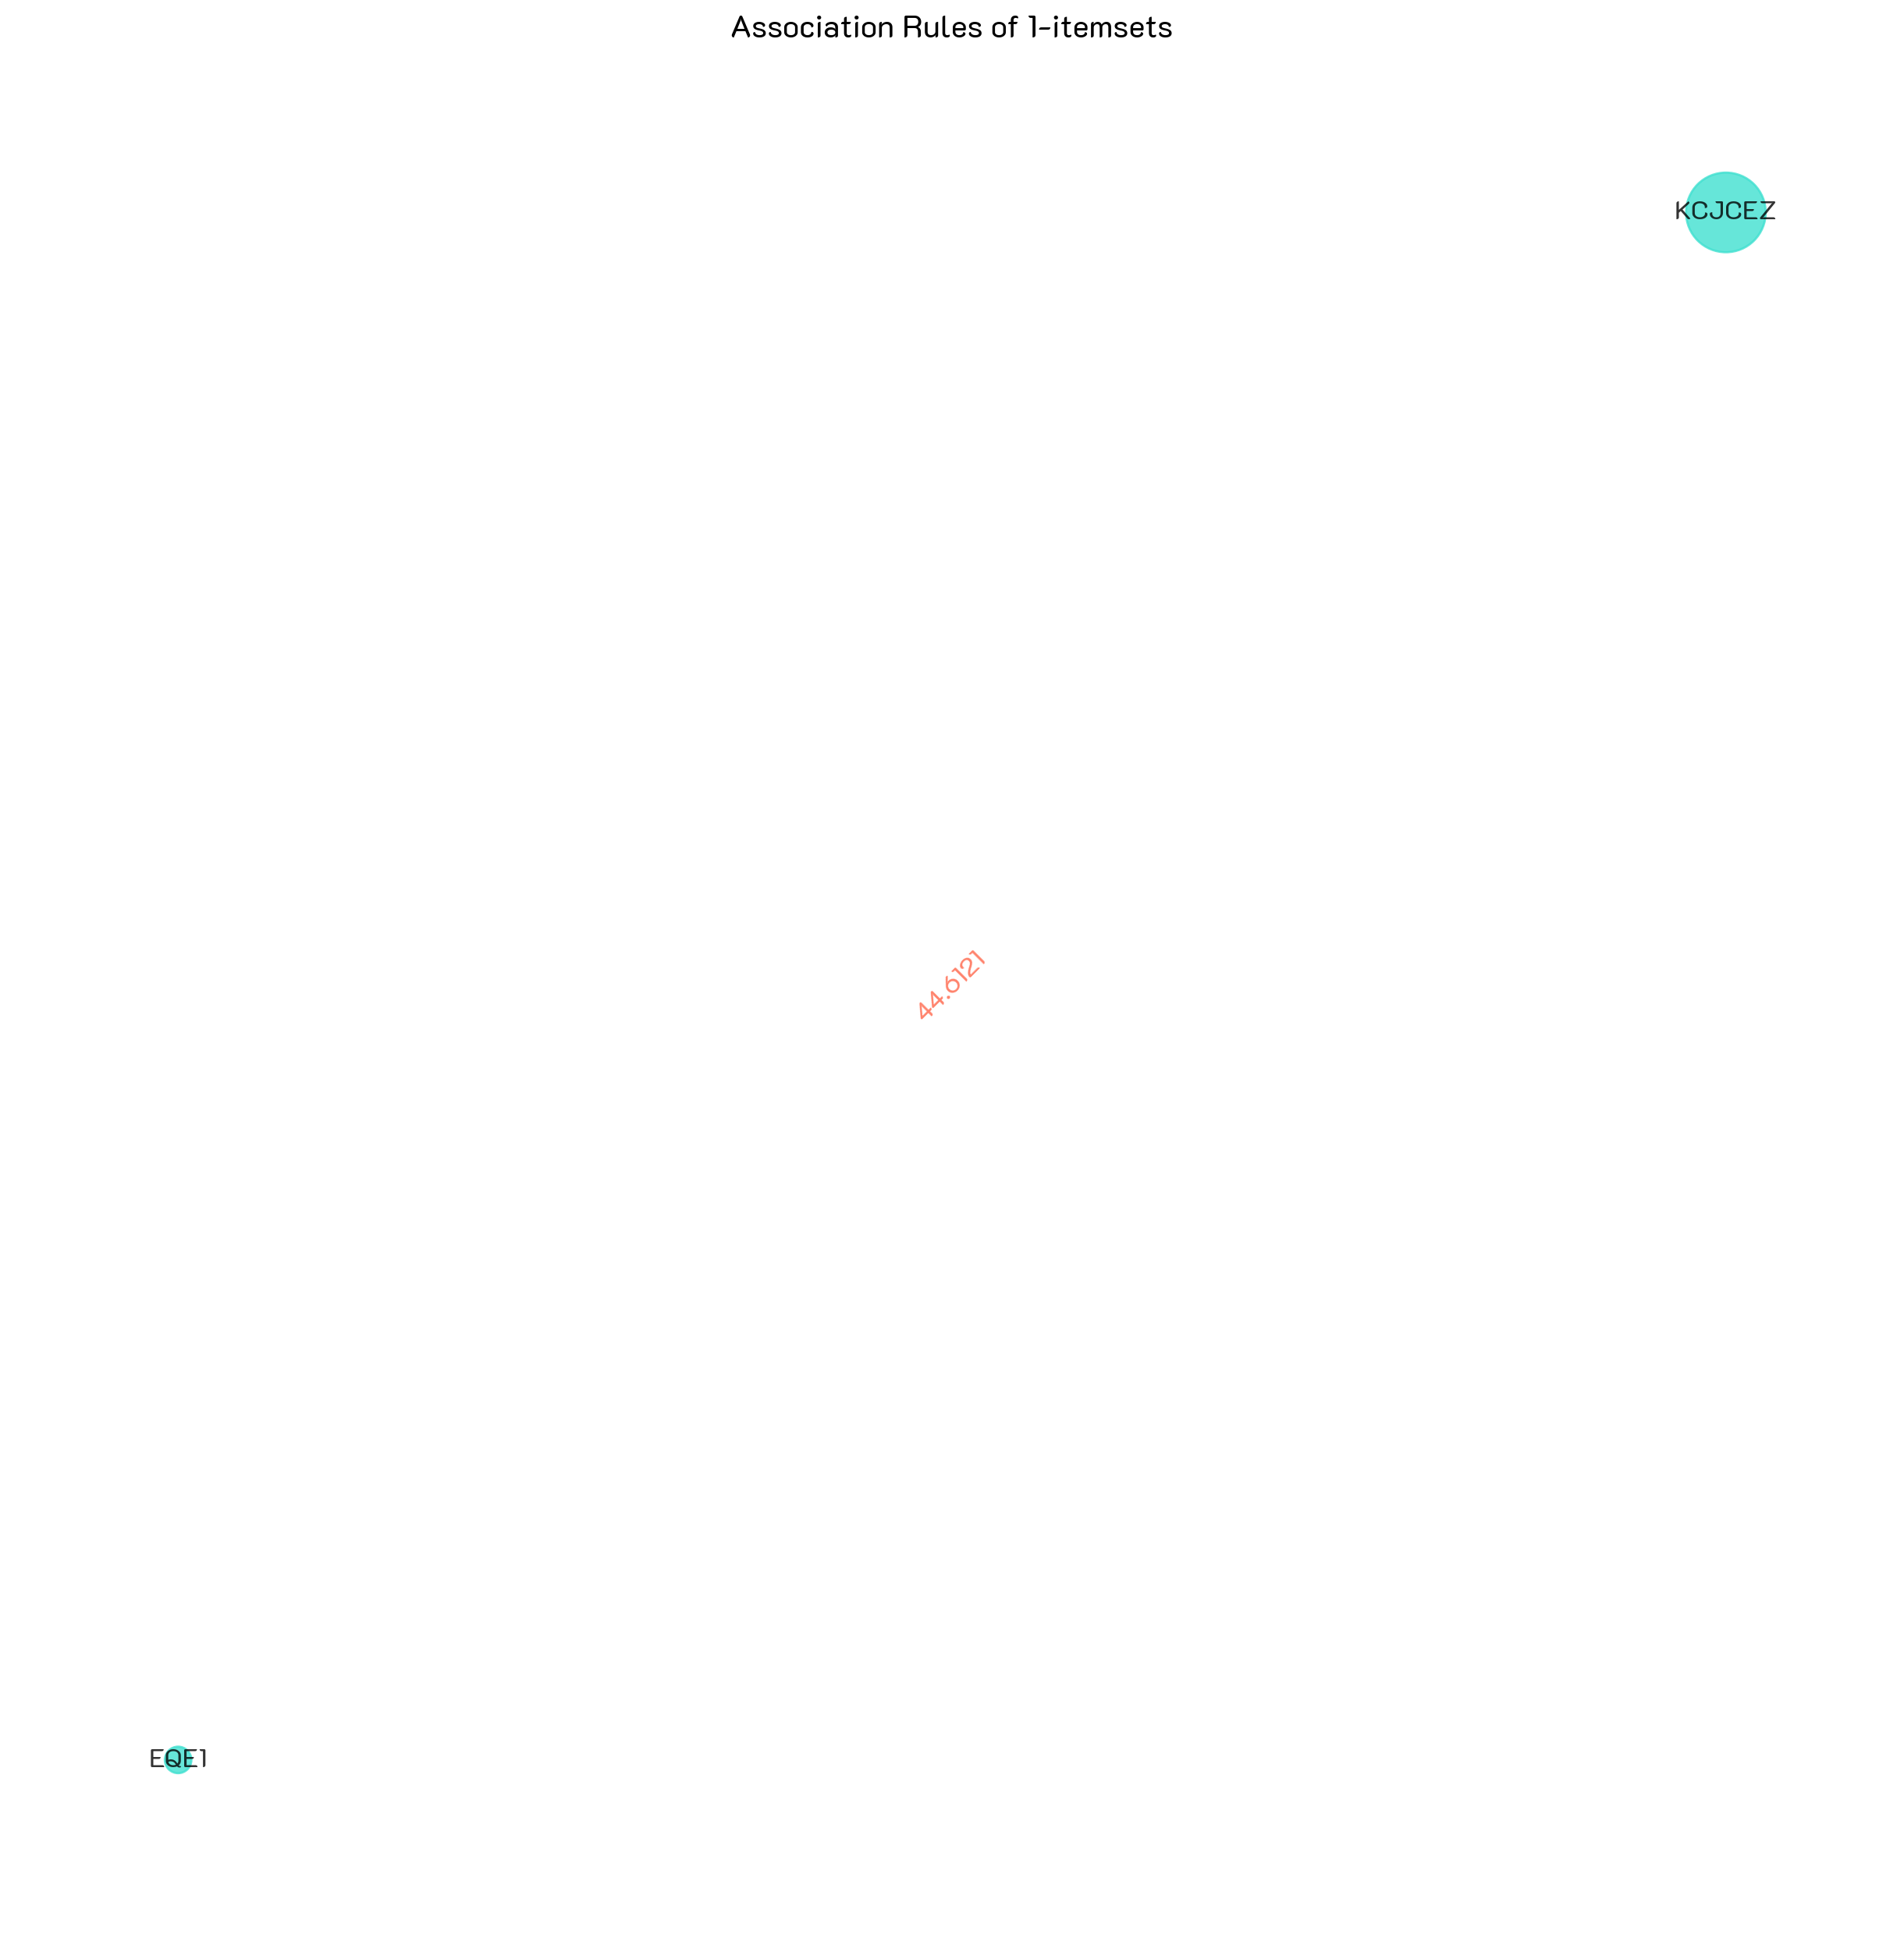

In [16]:
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        nodelist=nodelist, node_size=node_size, node_color='turquoise', 
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()

# Explore Rules

In [17]:
# Recommend 1 item based on 2 items
rules[(rules['antecedents'].apply(len) == 2) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [18]:
# Recommend 1 item based on 3 items
rules[(rules['antecedents'].apply(len) == 3) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


# Collaborative Filtering - Item Similarity

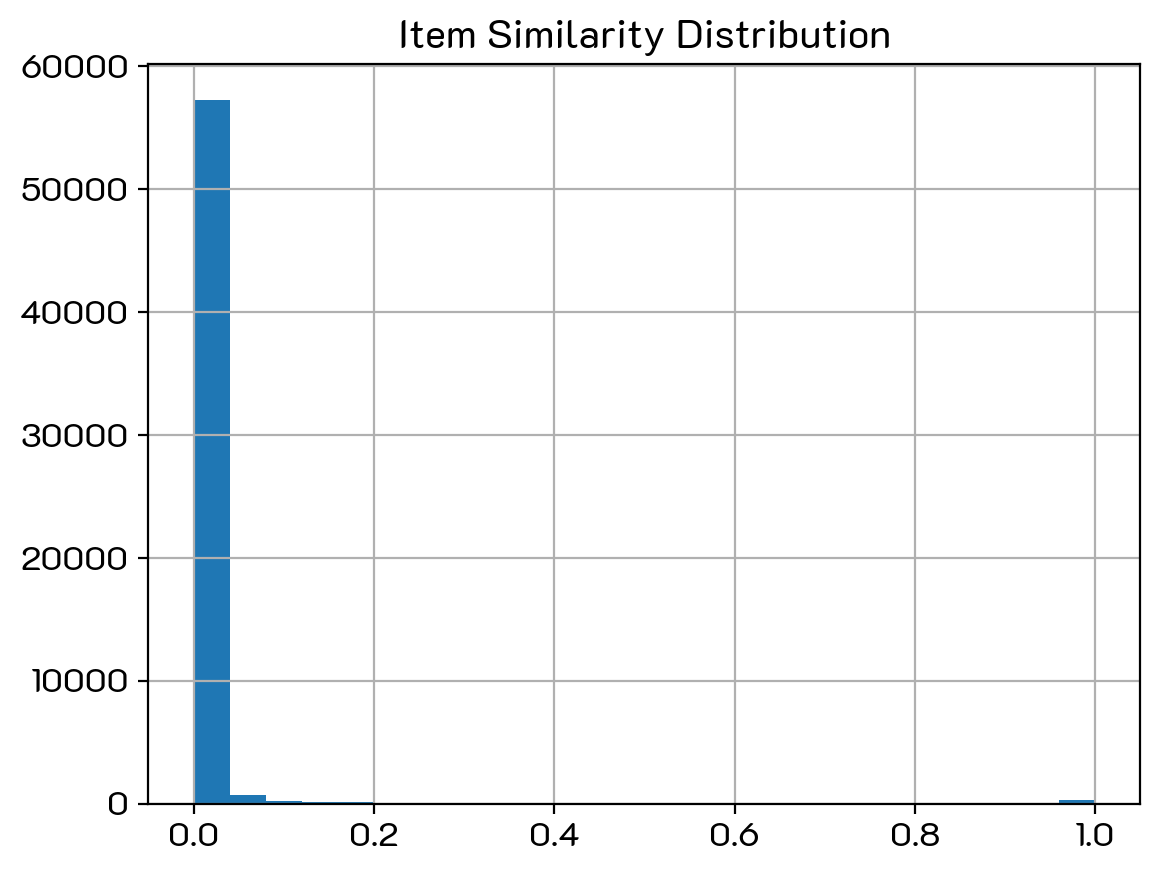

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

X = df.T
item_names = df.columns
item_sim = cosine_similarity(X)
item_sim = pd.DataFrame(item_sim, index=item_names, columns=item_names)
item_sim = item_sim.unstack().reset_index()
item_sim.columns = ['item1','item2','sim']
item_sim['sim'].hist(bins=25)
plt.title('Item Similarity Distribution');

In [20]:
sim_threshold = 0.65
sim_df = item_sim[item_sim.apply(lambda x: x['item1']!=x['item2'], axis=1) & item_sim['sim'].between(sim_threshold, 1)]
sim_df.sort_values('sim', ascending=False)

,item1,item2,sim
7812,4RC4,4RCR,1.000000
8049,4RCE,4RC1,1.000000
8054,4RCE,4RCQ,1.000000
8055,4RCE,4RCR,1.000000
8535,4RCQ,4RC1,1.000000
...,...,...,...
35879,KC4CCW,KC4CJ4,0.674200
34421,KC4C4E,KC4CJ4,0.668651
38535,KC4CJ4,KC4C4E,0.668651
38534,KC4CJ4,KC4C4C,0.659276


Number of nodes: 36
Number of edges: 109


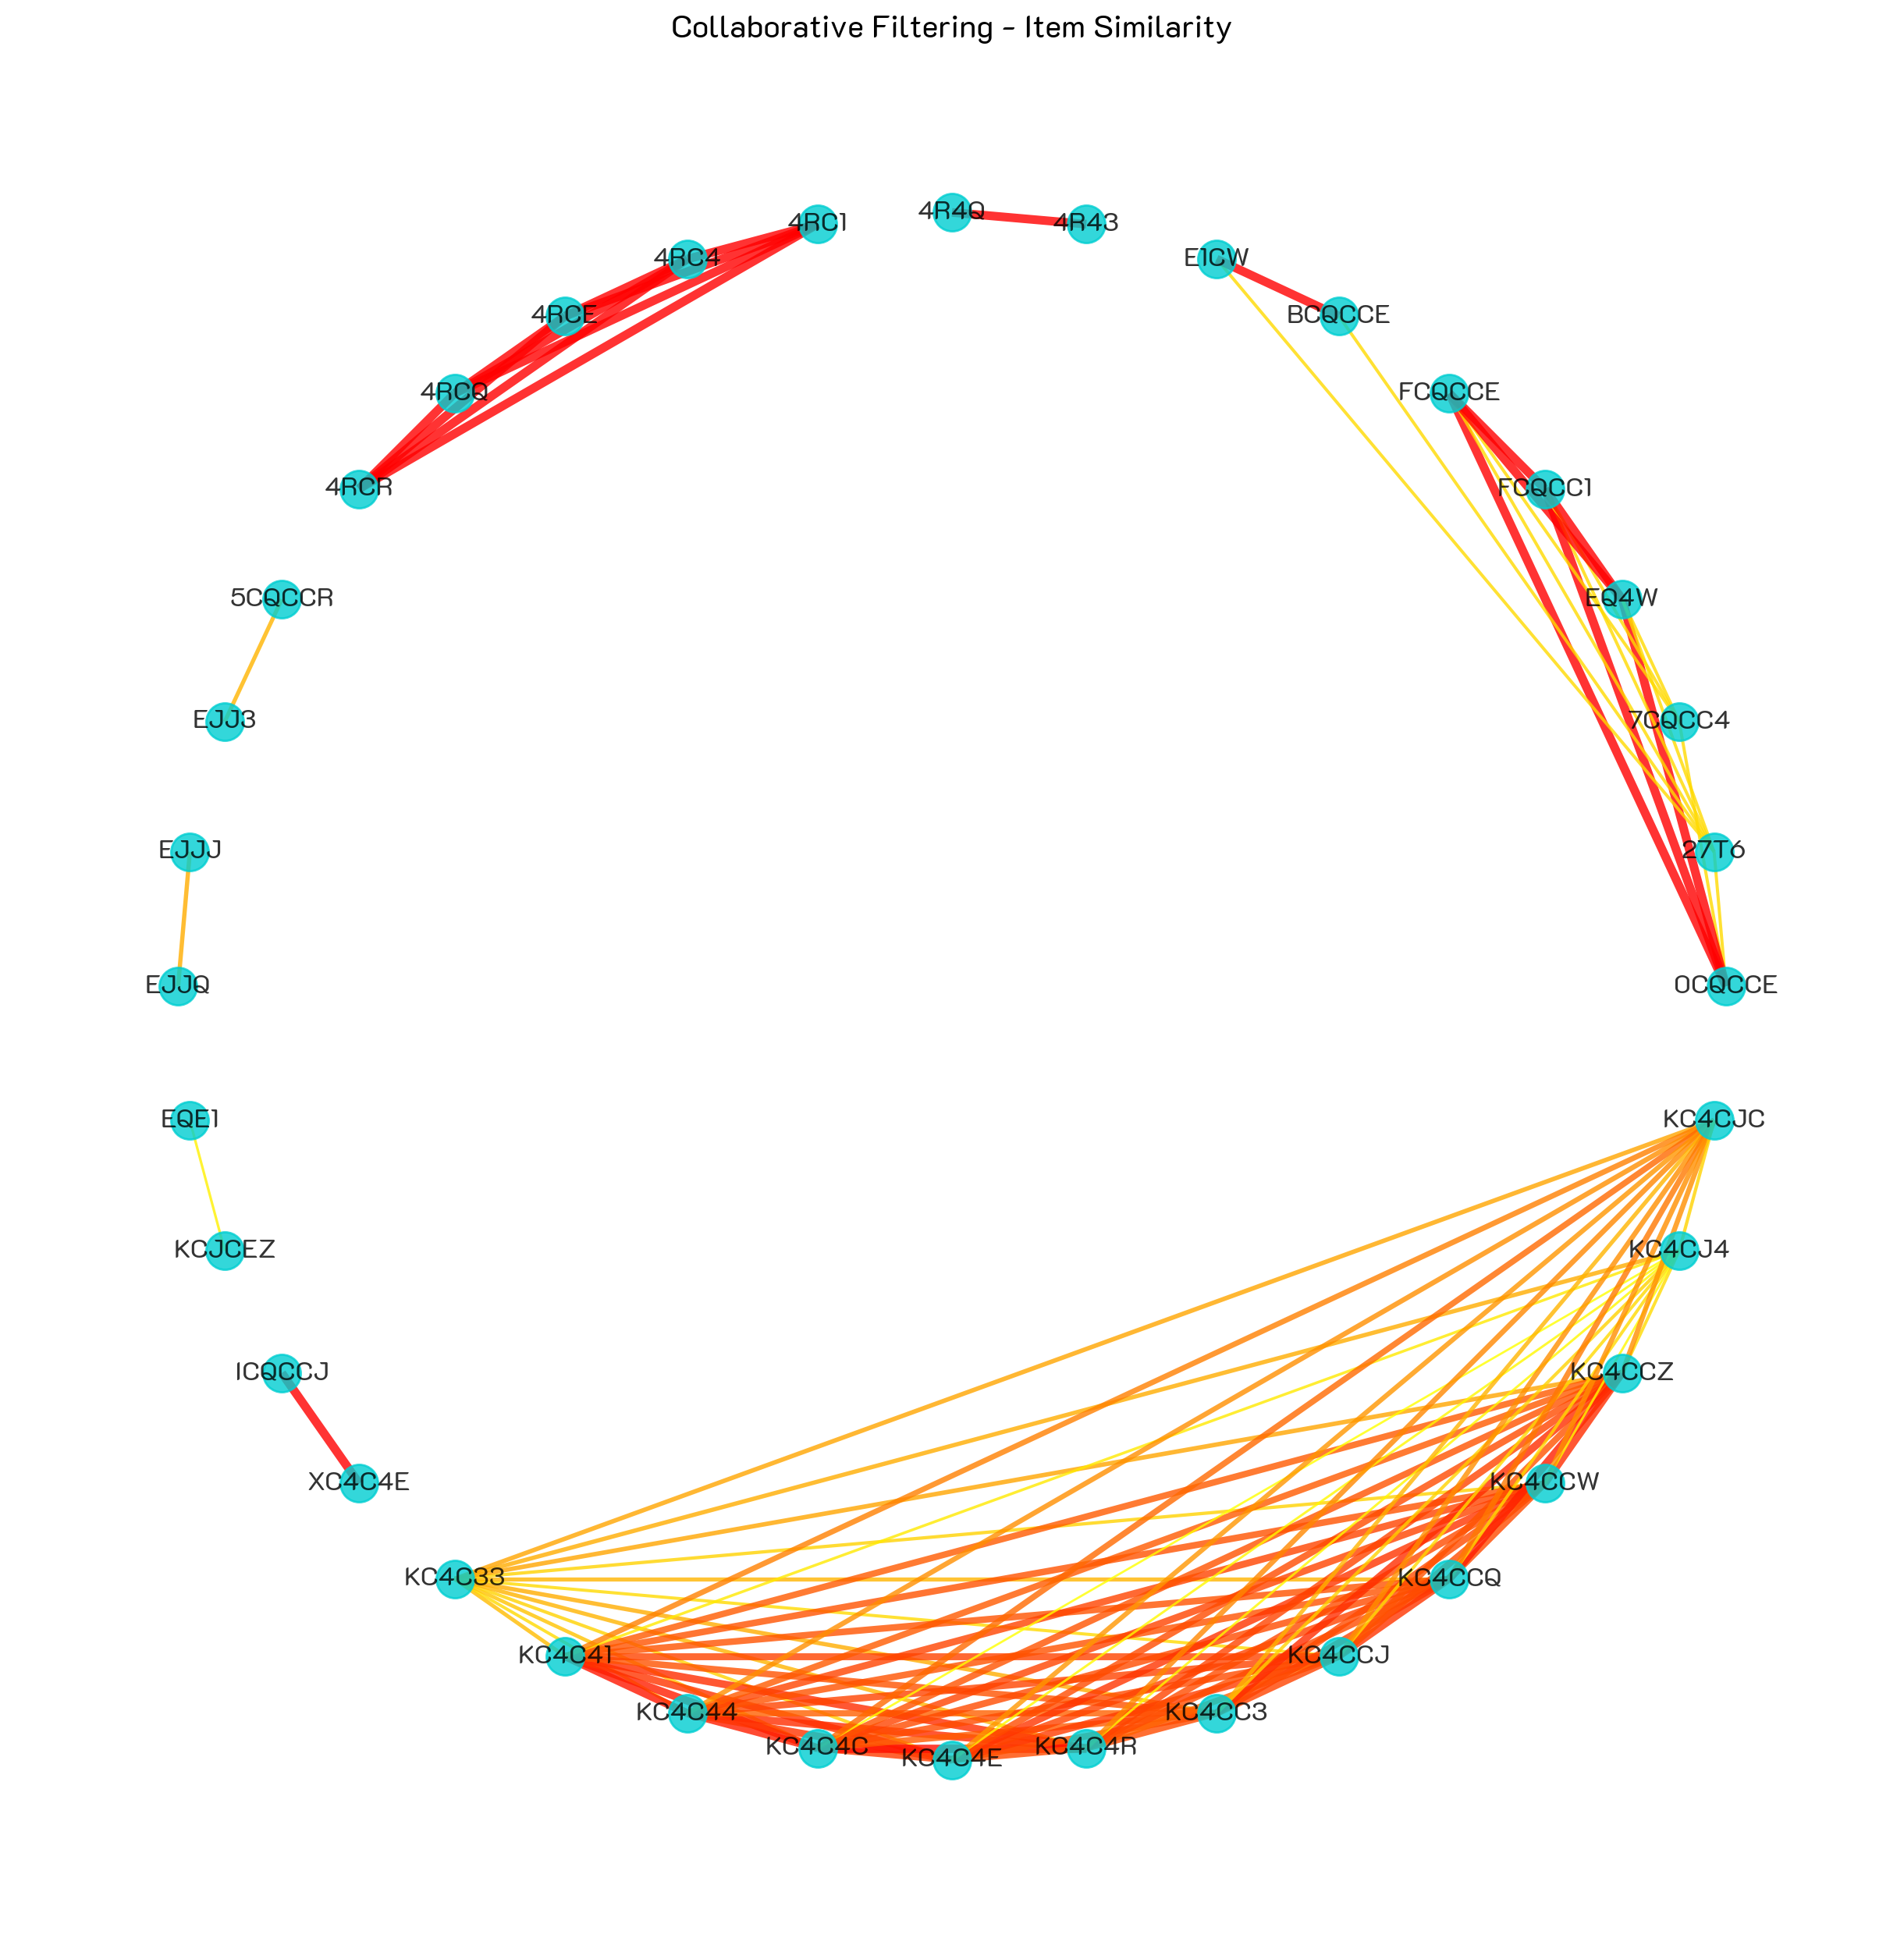

In [21]:
#print("Number of nodes:", nx.number_of_nodes(G))
#print("Number of edges:", nx.number_of_edges(G))

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_weighted_edges_from([(x['item1'], x['item2'], round(x['sim'], 2)) for i, x in sim_df.iterrows()])

labels_params = {'font_family': 'K2D', 'alpha': 0.8, 'font_size': 12}

edgelist, weights = zip(*[((u, v), d['weight']) for u, v, d in G.edges(data=True)])
width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights))) * 3

plt.figure(figsize=(12, 12))
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos, with_labels=True, node_color='darkturquoise',
        edgelist=edgelist, width=width,
        edge_color=weights, edge_cmap=plt.cm.autumn_r,
        **labels_params)

# Print graph information
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

plt.title('Collaborative Filtering - Item Similarity')
plt.show()



# Matrix Factorization

In [22]:
from sklearn.decomposition import NMF

# X = df.drop(['ครีมกันแดด','กระเป๋า','ชาบู'],axis=1) # remove items that all users use
X = df
n_factors = 12

nmf = NMF(n_factors, random_state=48)
W = nmf.fit_transform(X)
H = nmf.components_
print(f'Reconstruction error: {nmf.reconstruction_err_}')

# reconstruct rating matrix -> recommendation 
rec_df = pd.DataFrame(W @ H, columns=X.columns, index=X.index)
rec_df.head()


Reconstruction error: 529.4346279586551


,0C1CC1,0C1CCE,0C4C4Z,0C4CCJ,0C4CCZ,0C4CE1,0C4CE4,0C4CEC,0C4CEE,0C4CER,...,XC4CC4,XC4CCE,XC4CCZ,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,YC1CC4
0,0.022980,0.018173,0.000000e+00,1.298105e-05,0.035354,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.006552,0.051568,0.000000e+00,0.008376,0.017570,0.015904,0.001726,0.000000e+00,0.000000e+00,0.033077
1,0.022978,0.018348,0.000000e+00,1.298004e-05,0.049275,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.011110,0.021097,0.000000e+00,0.008831,0.017569,0.002021,0.001726,0.000000e+00,0.000000e+00,0.036242
2,0.001208,0.001422,1.608064e-97,6.017466e-07,0.035552,8.578179e-98,4.855939e-97,1.218001e-96,3.117349e-98,1.073540e-97,...,0.007496,0.003354,5.794750e-98,0.000927,0.000931,0.002161,0.000080,1.642167e-99,0.000000e+00,0.005849
3,0.001531,0.001758,9.168951e-97,7.169909e-07,0.003691,4.891156e-97,2.768788e-96,6.944868e-96,1.777469e-97,6.121171e-97,...,0.001250,0.002545,3.304084e-97,0.000652,0.001258,0.000331,0.000095,9.363405e-99,0.000000e+00,0.003920
4,0.000021,0.000103,3.883649e-97,0.000000e+00,0.000427,2.071724e-97,1.172762e-96,2.941605e-96,7.528740e-98,2.592716e-97,...,0.000219,0.000409,1.399496e-97,0.000029,0.000047,0.000075,0.000000,3.966014e-99,1.039363e-87,0.000236


In [23]:
rating_df = df.reset_index().melt(id_vars='index') \
    .merge(rec_df.reset_index().melt(id_vars='index'), left_on=['index','variable'], right_on=['index','variable']) \
    .rename({'variable':'item', 'value_x' : 'r', 'value_y' : 'r_pred' }, axis=1) 
rating_df

,index,item,r,r_pred
0,0,0C1CC1,False,0.022980
1,1,0C1CC1,False,0.022978
2,2,0C1CC1,False,0.001208
3,3,0C1CC1,False,0.001531
4,4,0C1CC1,False,0.000021
...,...,...,...,...
87992482,362104,YC1CC4,False,0.000004
87992483,362105,YC1CC4,False,0.000004
87992484,362106,YC1CC4,False,0.000004
87992485,362107,YC1CC4,False,0.000004


# Recommended item for each user


In [24]:
# recommendation is the not-purchased items with the highest predicted rating
rec_items = rating_df[rating_df['r']==0].sort_values(['index','r_pred'], ascending=False).groupby('index').nth(0)
rec_items

,item,r,r_pred
index,,,
0,XC4CCE,False,0.051568
1,0C4CCZ,False,0.049275
2,6CQC41,False,0.045888
3,6CQC41,False,0.054676
4,KC4CC4,False,0.001761
...,...,...,...
362104,6CQC41,False,0.000127
362105,6CQC41,False,0.000127
362106,6CQC41,False,0.000127


In [ ]:
import umap

temp = pd.DataFrame(np.vstack([W, H.T]))
temp.shape

reducer = umap.UMAP()
embed = reducer.fit_transform(temp)
embed.shape

In [ ]:
latent_df = pd.DataFrame(embed, columns=['x','y'])
latent_df['type'] = ['user'] * W.shape[0] + ['item'] * H.shape[1]
latent_df['label'] = list(X.index) + list(X.columns)
latent_df

In [ ]:
plt.figure(figsize=(16,16), tight_layout=True)
sns.scatterplot(x='x', y='y', hue='type', data=latent_df, style='type')
for i,r in latent_df.iterrows():
    px, py, text = r['x'], r['y'], r['label']
    plt.annotate(text, (px+.02,py+.02), color='.2', alpha=.7)
plt.title('User & Item Representation on Latent Space')
plt.savefig('user-item-latent-space.png', dpi=120)
plt.show()